In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.gaussian_process import GaussianProcessRegressor,kernels
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from src.models.constants import Constants
from src.models import util

ModuleNotFoundError: No module named 'src'

In [5]:
plt.style.use('seaborn-v0_8-talk')
cmap = plt.get_cmap("tab10")
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Incl. Rnd 1",3:"Incl. Rnd 2",4:"Incl. Rnd 3",5:"Incl. Rnd 4"}
seed=0
fname = f'3-averaged_All-Std-Data-Thru-Rnd-5.csv' #Data through Round 4
f = processed_dir+"/"+fname
df = pd.read_csv(f,index_col=0)
df.head()

,Pt,Sn,Ga,Fe,Cu,Ca,Mn,Zn,k_d,Y0,lifetime_yield,Y_pc,sqrtY0Y_pc,lifetime_yield_sd,Y_pc_sd,sqrtY0Y_pc_sd
0,1,0.0,0.0,0.0,0.0,0.0,0,0,0.009888,0.079167,7.906378,7.122892,0.749430,1.391523,0.117528,0.012366
1,1,0.0,0.0,0.0,0.0,1.0,0,0,0.006639,0.052747,7.944507,6.330042,0.577835,1.398233,0.104446,0.009534
2,1,0.0,0.0,0.0,0.0,4.0,0,0,0.005610,0.211910,37.771519,27.945063,2.433485,6.647787,0.461094,0.040152
3,1,0.0,0.0,0.0,0.0,8.0,0,0,0.006555,0.162041,24.720653,19.593907,1.781855,4.350835,0.323299,0.029401
4,1,0.0,0.0,0.0,1.0,0.0,0,0,0.006305,0.211454,33.538397,26.152810,2.351620,5.902758,0.431521,0.038802


In [6]:
X,y=util.get_Xy(df)
print(f'Num Samples: {X.shape[0]}, Num Features: {X.shape[1]}')
X.head()
print(f'Range of y: {max(y)-min(y):.3} Mean of y: {y.mean():.3} SD of y: {y.std():.3}')

Num Samples: 62, Num Features: 7
Range of y: 4.29 Mean of y: 3.39 SD of y: 1.22


In [7]:
X,y=util.get_Xy(df)
n = X.shape[0]
X = X.to_numpy()
y = y.to_numpy()
y_preds = []
y_stds = []
y_actuals = []
loo = KFold(n_splits=n)
for train_index,test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pipeline = make_pipeline(GaussianProcessRegressor(kernel=1*kernels.RBF(length_scale=1.0,length_scale_bounds=(1e-2,1e2)),n_restarts_optimizer=5,random_state=seed))
    pipeline.fit(X_train,y_train)
    y_pred,y_pred_std = pipeline.predict(X_test,return_std=True)
    y_preds.append(y_pred[0])
    y_stds.append(y_pred_std[0])
    y_actuals.append(y_test[0])


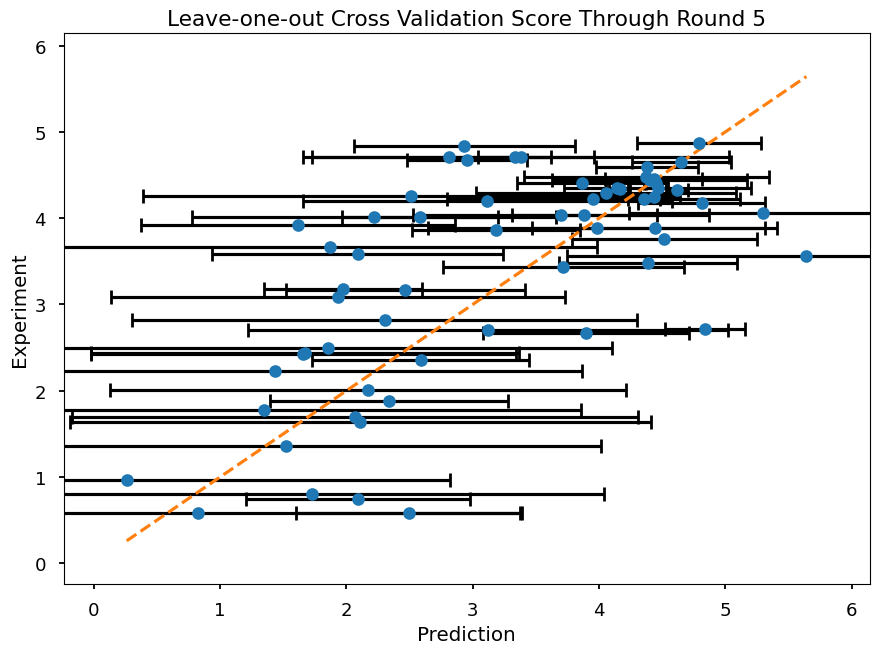

In [11]:
plt.errorbar(y_preds, y_actuals, xerr=y_stds, capsize=5, capthick=2, fmt="o", ecolor = "black")
# plt.plot(y_preds,y_actuals,'o')
plt.plot([min(y_preds),max(y_preds)],[min(y_preds),max(y_preds)],'--')
plt.xlabel("Prediction")
plt.ylabel("Experiment")
plt.xlim((min(y_preds)-.5,max(y_preds)+.5))
plt.ylim((min(y_preds)-.5,max(y_preds)+.5))
plt.title("Leave-one-out Cross Validation Score Through Round 5")
#plt.savefig("./figures/LOO-CV-Thru_Rnd_4-With_Error_Bars.png",dpi=600,bbox_inches='tight')
plt.show()

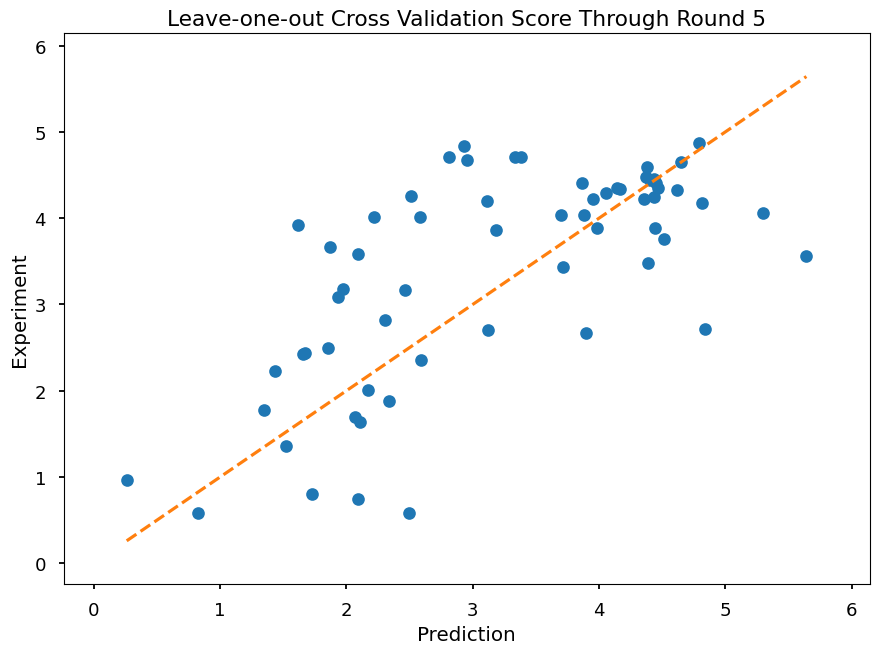

In [10]:
plt.plot(y_preds, y_actuals, 'o')
# plt.plot(y_preds,y_actuals,'o')
plt.plot([min(y_preds),max(y_preds)],[min(y_preds),max(y_preds)],'--')
plt.xlabel("Prediction")
plt.ylabel("Experiment")
plt.xlim((min(y_preds)-.5,max(y_preds)+.5))
plt.ylim((min(y_preds)-.5,max(y_preds)+.5))
plt.title("Leave-one-out Cross Validation Score Through Round 5")
#plt.savefig("./figures/LOO-CV-Thru_Rnd_4-Without_Error_Bars.png",dpi=600,bbox_inches='tight')
plt.show()

In [9]:
mean_absolute_error(y_actuals,y_preds)

0.7744533591191028

In [55]:
n_arr = {}
for n in [10,20,30,40,50]:
    X,y=util.get_Xy(df)
    random.seed(seed)
    indices = random.sample(range(X.shape[0]),n) #take n samples without replacement
    
    X = X.to_numpy()[indices]
    y = y.to_numpy()[indices]
    y_preds = []
    y_stds = []
    y_actuals = []
    loo = KFold(n_splits=n)
    for train_index,test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        pipeline = make_pipeline(GaussianProcessRegressor(kernel=1*kernels.RBF(length_scale=1.0,length_scale_bounds=(1e-2,1e2)),n_restarts_optimizer=5,random_state=seed))
        pipeline.fit(X_train,y_train)
        y_pred,y_pred_std = pipeline.predict(X_test,return_std=True)
        y_preds.append(y_pred[0])
        y_stds.append(y_pred_std[0])
        y_actuals.append(y_test[0])
    n_arr[n]={"y_preds":y_preds,"y_actuals":y_actuals,"y_stds":y_stds}


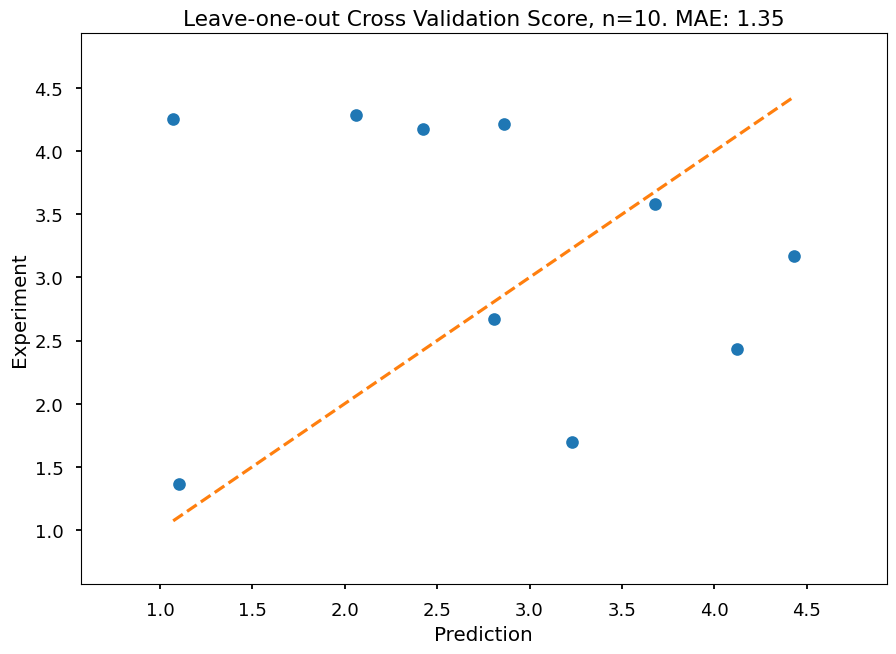

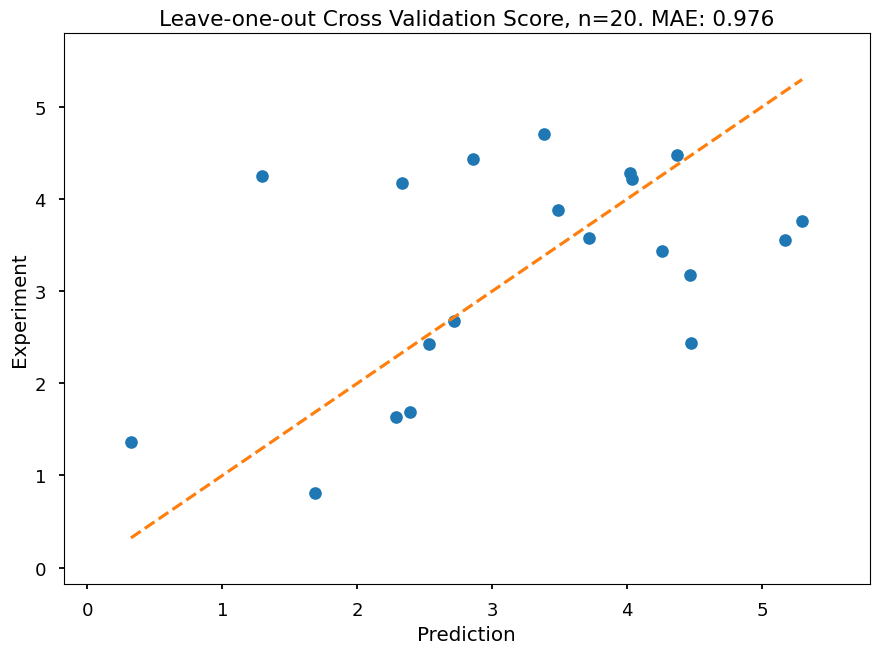

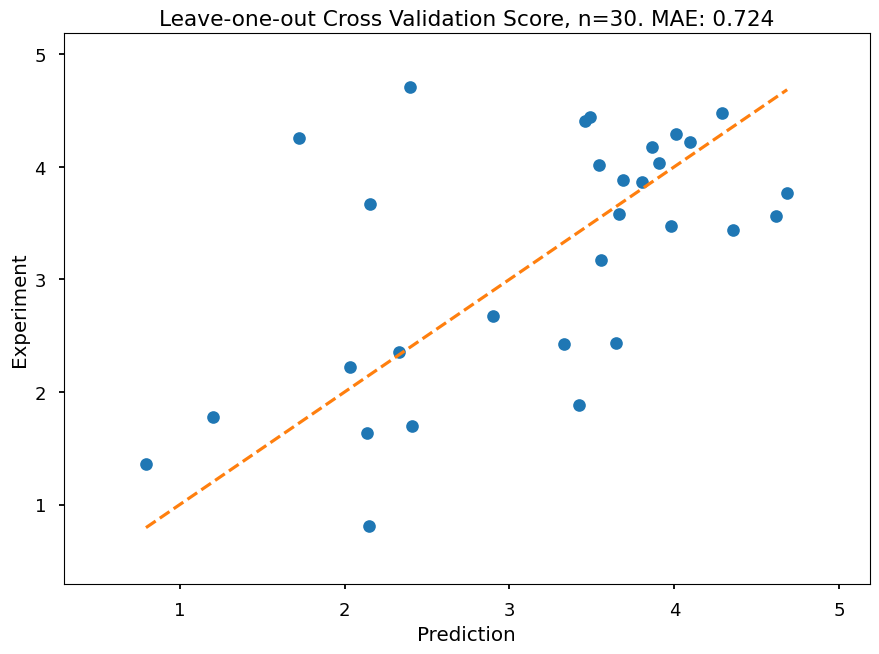

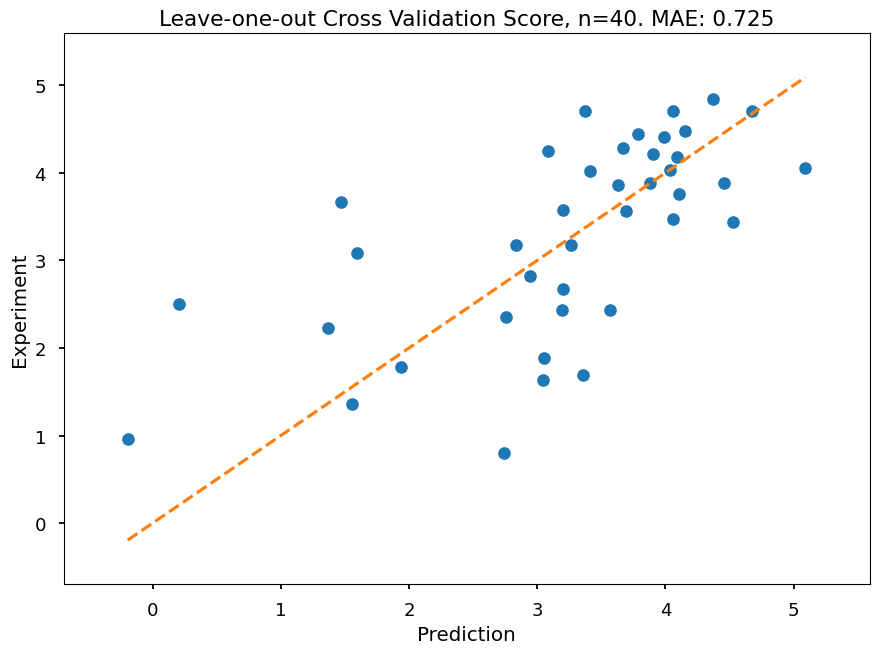

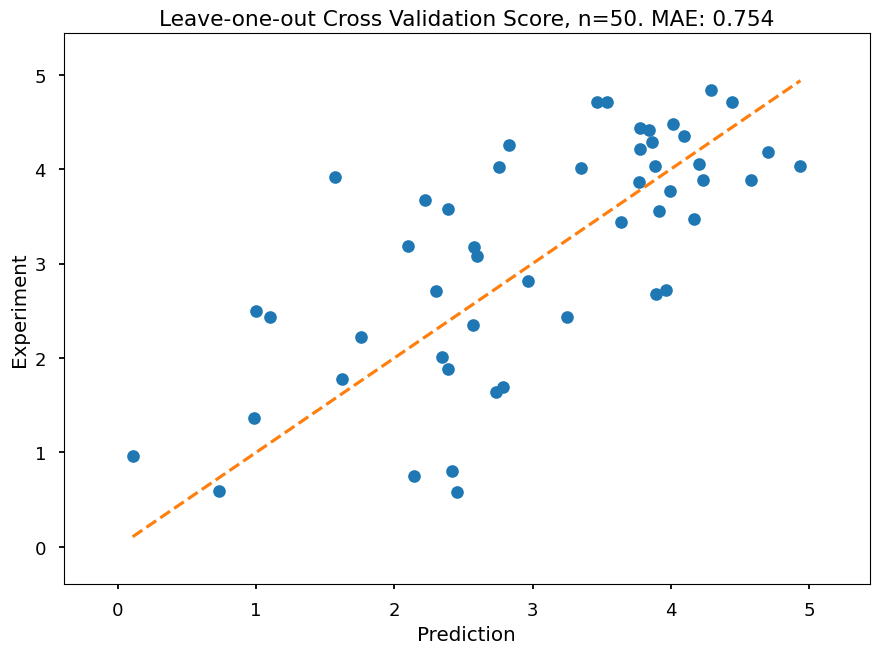

In [59]:
for n in [10,20,30,40,50]:
    y_preds = n_arr[n]["y_preds"]
    y_actuals = n_arr[n]["y_actuals"]
    y_stds = n_arr[n]["y_stds"]
    plt.plot(y_preds, y_actuals, 'o')
    plt.plot([min(y_preds),max(y_preds)],[min(y_preds),max(y_preds)],'--')
    plt.xlabel("Prediction")
    plt.ylabel("Experiment")
    plt.xlim((min(y_preds)-.5,max(y_preds)+.5))
    plt.ylim((min(y_preds)-.5,max(y_preds)+.5))
    plt.title(f'Leave-one-out Cross Validation Score, n={n}. MAE: {mean_absolute_error(y_actuals,y_preds):.3}')
    #plt.savefig("./figures/LOO-CV-Thru_Rnd_4-Without_Error_Bars.png",dpi=600,bbox_inches='tight')
    plt.show()

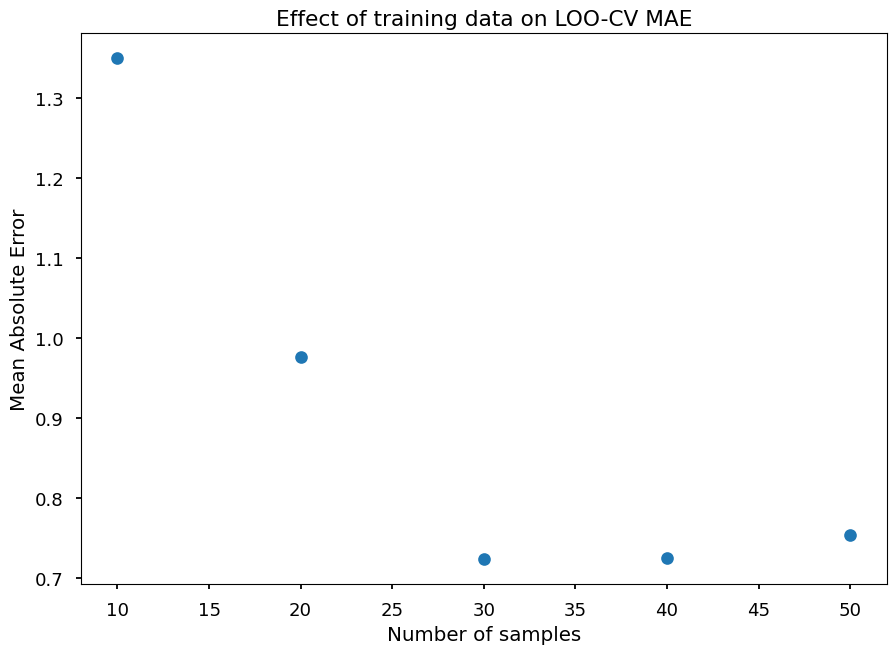

In [63]:
mae_arr = []
for n in [10,20,30,40,50]:
    y_preds = n_arr[n]["y_preds"]
    y_actuals = n_arr[n]["y_actuals"]
    y_stds = n_arr[n]["y_stds"]
    mae_arr.append(mean_absolute_error(y_actuals,y_preds))
plt.plot([10,20,30,40,50],mae_arr,'o')
plt.xlabel("Number of samples")
plt.ylabel("Mean Absolute Error")

plt.title(f'Effect of training data on LOO-CV MAE')
plt.savefig("./figures/LOO-CV-Thru_Rnd_4-At_Various_n.png",dpi=600,bbox_inches='tight')
plt.show()